In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('data_cleaned.csv', low_memory=False)
data.dropna(inplace=True)
data.reset_index(drop=True)

,Date,Time,Inning,PitchNo,PAofInning,PitchofPA,Batter,BatterTeam,Pitcher,PitcherTeam,Swing/Take,Outs,Runners,Count,PlateLocHeight,PlateLocSide,ERV_delta,target
0,2022-02-18,13:32:19.860000,1,1,1,1,"Rotondo, Chris",VIL_WIL,"Kniskern, Trevor",PEP_WAV,Take,0,0,5,0.70404,-1.08025,0.061773,0.070261
1,2022-02-18,13:32:36,1,2,1,2,"Rotondo, Chris",VIL_WIL,"Kniskern, Trevor",PEP_WAV,Take,0,0,6,1.97665,-0.65021,-0.069608,-0.079011
2,2022-02-18,13:33:12.450000,1,3,1,3,"Rotondo, Chris",VIL_WIL,"Kniskern, Trevor",PEP_WAV,Swing,0,0,4,3.26746,-0.21261,-0.310076,0.067314
3,2022-02-18,13:33:53.170000,1,4,2,1,"O'Neill, Pat",VIL_WIL,"Kniskern, Trevor",PEP_WAV,Take,1,0,5,3.25160,-0.18235,-0.063858,-0.073452
4,2022-02-18,13:34:10.280000,1,5,2,2,"O'Neill, Pat",VIL_WIL,"Kniskern, Trevor",PEP_WAV,Take,1,0,2,2.90450,-1.55769,0.056162,0.064070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487549,2022-04-15,19:27:29.630000,8,235,2,2,"Callahan, Ryan",KAN_JAY,"Andrade, Kobe",BAY_BEA,Take,0,1,2,3.54317,-1.76821,0.884838,0.064070
487550,2022-04-15,19:28:09.370000,8,236,3,1,"English, Jake",KAN_JAY,"Andrade, Kobe",BAY_BEA,Swing,0,3,5,1.47027,0.49738,-0.736111,0.027057
487551,2022-04-15,19:28:45.530000,8,237,4,1,"Rivera, Sergio",KAN_JAY,"Andrade, Kobe",BAY_BEA,Take,1,3,5,1.79094,0.24564,-0.107744,-0.073452
487552,2022-04-15,19:29:06.560000,8,238,4,2,"Rivera, Sergio",KAN_JAY,"Andrade, Kobe",BAY_BEA,Swing,1,3,2,1.10131,-0.21625,-0.171934,-0.086448


In [4]:
# Separate swing from take data 
swing_data = data[data['Swing/Take'] == 'Swing']
take_data = data[data['Swing/Take'] == 'Take']

In [5]:
from matplotlib.colors import Normalize

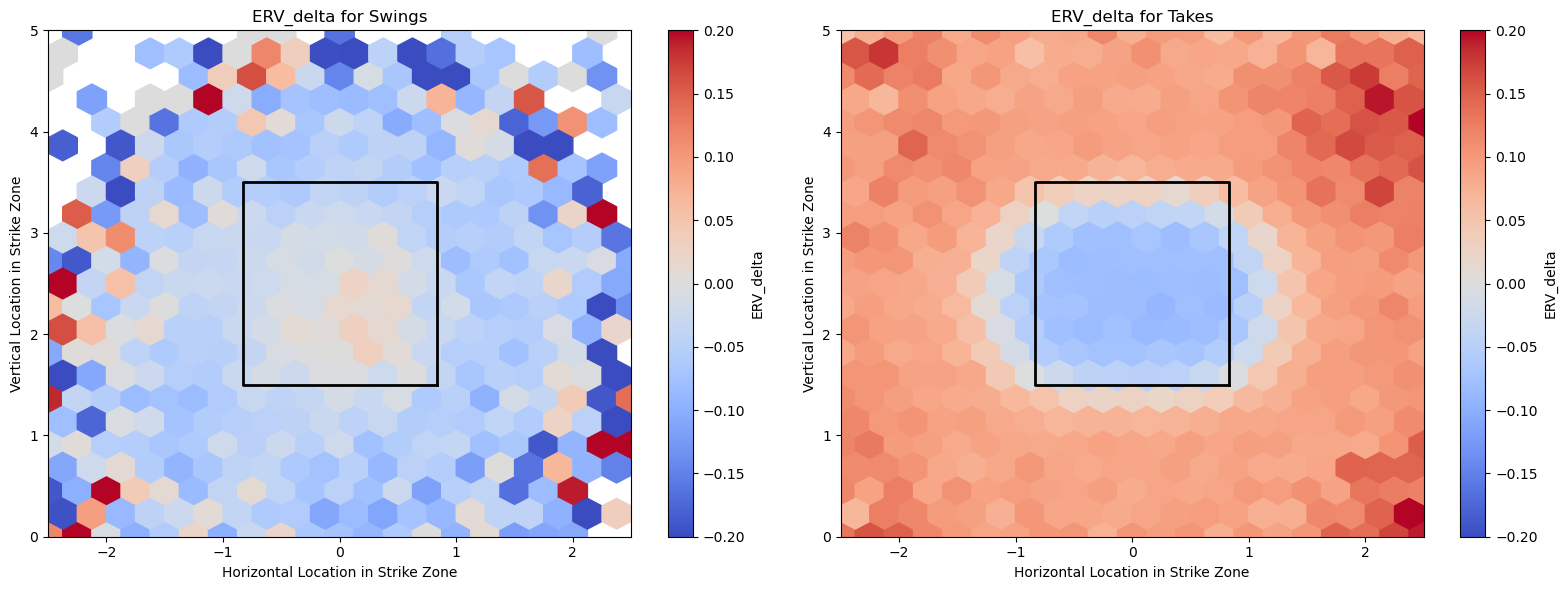

In [6]:
x_swings = swing_data['PlateLocSide']
y_swings = swing_data['PlateLocHeight']
erv_delta_swings = swing_data['ERV_delta']

x_takes = take_data['PlateLocSide']
y_takes = take_data['PlateLocHeight']
erv_delta_takes = take_data['ERV_delta']

strike_zone_x = [0.833, 0.833, -0.833, -0.833, 0.833]
strike_zone_y = [1.5, 3.5, 3.5, 1.5, 1.5]
x_range = (-2.5, 2.5)
y_range = (0, 5)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hexbin plot for swings
hb_swings = axes[0].hexbin(
    x_swings, y_swings, C=erv_delta_swings, 
    gridsize=20, extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
    cmap='coolwarm', reduce_C_function=np.mean, 
    norm=Normalize(vmin=-0.2, vmax=0.2)
)
axes[0].plot(strike_zone_x, strike_zone_y, color='black', lw=2)
axes[0].set_xlim(x_range)
axes[0].set_ylim(y_range)
axes[0].set_title('ERV_delta for Swings')
axes[0].set_xlabel('Horizontal Location in Strike Zone')
axes[0].set_ylabel('Vertical Location in Strike Zone')
fig.colorbar(hb_swings, ax=axes[0], label='ERV_delta')

# Hexbin plot for takes
hb_takes = axes[1].hexbin(
    x_takes, y_takes, C=erv_delta_takes, 
    gridsize=20, extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
    cmap='coolwarm', reduce_C_function=np.mean, 
    norm=Normalize(vmin=-0.2, vmax=0.2)
)
axes[1].plot(strike_zone_x, strike_zone_y, color='black', lw=2)
axes[1].set_xlim(x_range)
axes[1].set_ylim(y_range)
axes[1].set_title('ERV_delta for Takes')
axes[1].set_xlabel('Horizontal Location in Strike Zone')
axes[1].set_ylabel('Vertical Location in Strike Zone')
fig.colorbar(hb_takes, ax=axes[1], label='ERV_delta')

plt.tight_layout()
plt.show()

In [7]:
X_swing = swing_data[['Outs', 'Runners', 'Count', 'PlateLocHeight', 'PlateLocSide']]
y_swing = swing_data['target']
X_take = take_data[['Outs', 'Runners', 'Count', 'PlateLocHeight', 'PlateLocSide']]
y_take = take_data['target']

In [8]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV

# Define features
columns_to_scale = ['PlateLocHeight', 'PlateLocSide']
columns_to_leave = ['Outs', 'Runners', 'Count']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', columns_to_leave)
    ]
)

# Define the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'model__n_estimators': [100],
    'model__learning_rate': [0.1],
    'model__max_depth': [3, 5, 7, 10], 
    'model__min_child_weight': [1, 5, 10],  # Controlling minimum samples in a leaf
    'model__subsample': [0.8],  # Subsample ratio for training instances
    'model__colsample_bytree': [0.8],  # Subsample ratio for features
    'model__reg_alpha': [0, 0.01, 0.1],  # L1 regularization term
    'model__reg_lambda': [1, 10, 100]  # L2 regularization term
}

# Pipeline
pipeline_swing = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', xgb_model)             # XGBoost model
])

X_train, X_test, y_train, y_test = train_test_split(X_swing, y_swing, test_size=0.2, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_swing,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", -grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nTest Data Metrics for Best Model:")
print(f"Mean Squared Error (MSE): {mse_best:.6f}")
print(f"R-squared (R²): {r2_best:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 5, 'model__n_estimators': 100, 'model__reg_alpha': 0.1, 'model__reg_lambda': 100, 'model__subsample': 0.8}
Best Cross-Validation Score: 0.004352187707426783

Test Data Metrics for Best Model:
Mean Squared Error (MSE): 0.004314
R-squared (R²): 0.3632


In [13]:
# Define features
columns_to_scale = ['PlateLocHeight', 'PlateLocSide']
columns_to_leave = ['Outs', 'Runners', 'Count']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', columns_to_leave)
    ]
)

# XGBRegressor model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=100,
    reg_alpha=0.1,
    reg_lambda=100,
    subsample=0.8,
    random_state=42 
)

# Pipeline
pipeline_swing = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', xgb_model)             # XGBoost model
])

X_train, X_test, y_train, y_test = train_test_split(X_swing, y_swing, test_size=0.2, random_state=42)

pipeline_swing.fit(X_train, y_train)


y_pred = pipeline_swing.predict(X_test)
y_pred_train = pipeline_swing.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Data Metrics:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared (R²): {r2:.4f}")

# Check for Overfitting
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("\nTraining Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.6f}")
print(f"R-squared (R²): {r2_train:.4f}")

Test Data Metrics:
Mean Squared Error (MSE): 0.004314
R-squared (R²): 0.3632

Training Data Metrics:
Mean Squared Error (MSE): 0.004314
R-squared (R²): 0.3663


In [15]:
xgb_model.save_model('swing_model.bin')

/Users/wesleykim/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:24:39] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [16]:
# Define features
columns_to_scale = ['PlateLocHeight', 'PlateLocSide']
columns_to_leave = ['Outs', 'Runners', 'Count']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', columns_to_leave)
    ]
)

# XGBRegressor model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=100,
    reg_alpha=0.1,
    reg_lambda=100,
    subsample=0.8,
    random_state=42 
)

# Pipeline
pipeline_take = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', xgb_model)             # XGBoost model
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_take, y_take, test_size=0.2, random_state=42)

# Train
pipeline_take.fit(X_train, y_train)

# Predict
y_pred = pipeline_take.predict(X_test)
y_pred_train = pipeline_take.predict(X_train)

# Evaluate 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Data Metrics:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared (R²): {r2:.4f}")

# Check for Overfitting
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("\nTraining Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.6f}")
print(f"R-squared (R²): {r2_train:.4f}")

Test Data Metrics:
Mean Squared Error (MSE): 0.002763
R-squared (R²): 0.6952

Training Data Metrics:
Mean Squared Error (MSE): 0.002719
R-squared (R²): 0.6990


In [17]:
xgb_model.save_model('take_model.bin')

/Users/wesleykim/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:24:47] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [18]:
report = pd.read_csv('/Users/beckettdowhan/Downloads/baseball_100k_target.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/beckettdowhan/Downloads/baseball_100k_target.csv'

In [27]:
report.rename(columns={'count_code': 'Count'}, inplace=True)

In [29]:
len(report)

100000

In [31]:
report['swing_value'] = pipeline_swing.predict(report)
report['take_value'] = pipeline_take.predict(report)

In [33]:
report['take_value'].mean()

0.013445232

In [35]:
report['swing_value'].mean()

-0.037211217

In [37]:
report['take_value'].std()

0.07867290824651718

In [39]:
report['swing_value'].std()

0.048838965594768524

In [41]:
report['swing_value'].max()

0.10138917714357376

In [43]:
sample_report = report.iloc[8:14]
sample_report[['PitchNo','Balls', 'Strikes', 'Swing/Take', 'PlayResult', 'PitchCall', 'swing_value', 'take_value', 'PlateLocSide', 'PlateLocHeight']]

,PitchNo,Balls,Strikes,Swing/Take,PlayResult,PitchCall,swing_value,take_value,PlateLocSide,PlateLocHeight
8,9,0,0,Swing,Undefined,StrikeSwinging,-0.054239,0.049689,-0.53552,3.49811
9,10,0,1,Take,Undefined,StrikeCalled,-0.017894,-0.026396,-1.09709,2.28773
10,11,0,2,Swing,Undefined,FoulBall,0.090542,-0.040417,-0.37454,2.31181
11,12,0,2,Take,Undefined,BallCalled,0.047230,0.067648,-1.57688,1.94192
12,13,1,2,Take,Undefined,BallCalled,-0.012685,0.085695,-2.53747,-0.01803
13,14,2,2,Swing,Out,InPlay,0.016234,0.001035,-1.05382,1.94066


In [238]:
sample_report2 = report.iloc[27:33]

In [245]:
sample_report3 = report.iloc[162:165]

In [214]:
sample_report3[['Balls', 'Strikes', 'Swing/Take', 'PlayResult', 'PitchCall', 'swing_value', 'take_value', 'PlateLocSide', 'PlateLocHeight']]

,Balls,Strikes,Swing/Take,PlayResult,PitchCall,swing_value,take_value,PlateLocSide,PlateLocHeight
162,0,0,Take,Undefined,StrikeCalled,-0.001637,-0.966600,-0.77517,2.85328
163,0,1,Swing,Undefined,FoulBall,0.850774,-1.218138,0.33346,2.29557
164,0,2,Take,Undefined,StrikeCalled,2.338887,-0.323481,-0.93111,2.49596


In [45]:
# Add a decision_value column based on Swing/Take
sample_report['decision_value'] = sample_report.apply(
    lambda row: row['swing_value'] if row['Swing/Take'] == 'Swing' else row['take_value'], axis=1
)

# Calculate the swing score for the at-bat
swing_score = sample_report['decision_value'].sum()




/var/folders/vj/mr9gtxyd13s7vdvt74wwnw3h0000gn/T/ipykernel_1390/1229809196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_report['decision_value'] = sample_report.apply(


In [239]:
# Add a decision_value column based on Swing/Take
sample_report2['decision_value'] = sample_report2.apply(
    lambda row: row['swing_value'] if row['Swing/Take'] == 'Swing' else row['take_value'], axis=1
)

# Calculate the swing score for the at-bat
swing_score2 = sample_report2['decision_value'].sum()


/var/folders/vj/mr9gtxyd13s7vdvt74wwnw3h0000gn/T/ipykernel_12086/3008856811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_report2['decision_value'] = sample_report2.apply(


In [246]:
# Add a decision_value column based on Swing/Take
sample_report3['decision_value'] = sample_report3.apply(
    lambda row: row['swing_value'] if row['Swing/Take'] == 'Swing' else row['take_value'], axis=1
)

# Calculate the swing score for the at-bat
swing_score3 = sample_report3['decision_value'].sum()

/var/folders/vj/mr9gtxyd13s7vdvt74wwnw3h0000gn/T/ipykernel_12086/3732833522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_report3['decision_value'] = sample_report3.apply(


/var/folders/vj/mr9gtxyd13s7vdvt74wwnw3h0000gn/T/ipykernel_1390/752534980.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


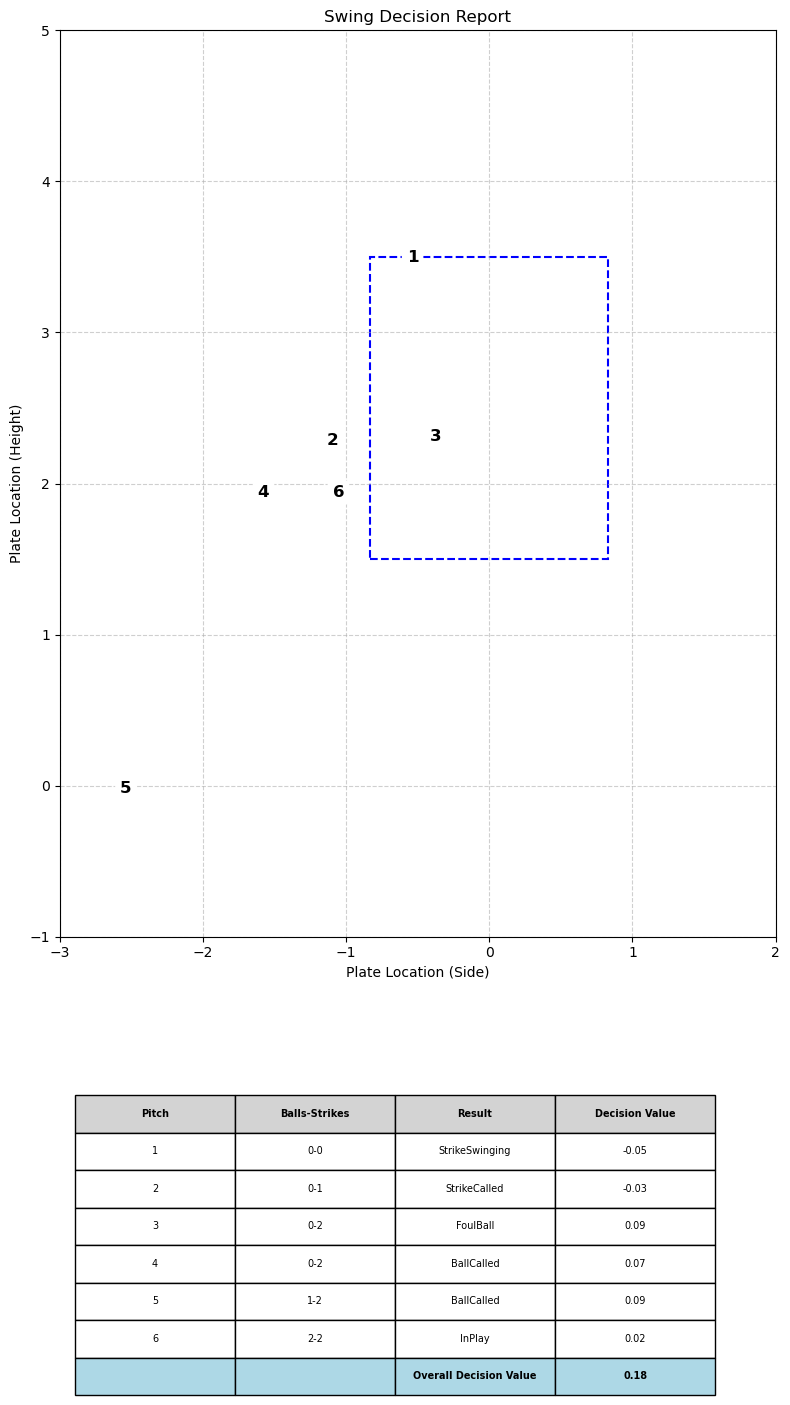

In [47]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Reset index to ensure proper sequential numbering from 1 to 6
sample_report = sample_report.reset_index(drop=True)

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 10))

# Define strike zone boundaries
strike_zone_x_min = -0.833
strike_zone_x_max = 0.833
strike_zone_y_min = 1.5
strike_zone_y_max = 3.5

# Adjust plotting bounds to ensure all pitches are visible
ax.set_xlim(-3, 2)  # Expand based on PlateLocSide range
ax.set_ylim(-1, 5)   # Expand based on PlateLocHeight range


# Plot each pitch and annotate with pitch number
for idx, row in sample_report.iterrows():
    color = 'green' if row['Swing/Take'] == 'Swing' else 'red'  # Color for swing/take
    pitch_number = idx + 1  # Number pitches 1 through 6
    
    # Plot the dot
    ax.scatter(row['PlateLocSide'], row['PlateLocHeight'], color=color, s=100, edgecolor='black')
    
    # Annotate with a bold number and a white background
    ax.text(row['PlateLocSide'], row['PlateLocHeight'], 
            str(pitch_number), 
            fontsize=12,  # Larger font size
            fontweight='bold',  # Bold font
            color='black',  # Black text color
            ha='center', va='center',  # Center alignment
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))  # Add a white background



# Add the strike zone rectangle
strike_zone = plt.Rectangle((strike_zone_x_min, strike_zone_y_min), 
                             strike_zone_x_max - strike_zone_x_min, 
                             strike_zone_y_max - strike_zone_y_min,
                             edgecolor='blue', facecolor='none', linestyle='--', linewidth=1.5)
ax.add_patch(strike_zone)

# Customize the plot
ax.set_title(f"Swing Decision Report")
ax.set_xlabel('Plate Location (Side)')
ax.set_ylabel('Plate Location (Height)')
ax.grid(True, linestyle='--', alpha=0.6)

# Add the table below the plot
table_data = [['Pitch', 'Balls-Strikes', 'Result', 'Decision Value']]
for idx, row in sample_report.iterrows():
    pitch_number = idx + 1
    table_data.append([
        pitch_number, 
        f"{row['Balls']}-{row['Strikes']}",
        row['PitchCall'],  # Use the value from the PitchCall column
        f"{row['decision_value']:.2f}"
    ])

# Calculate the overall decision value
overall_decision_value = sample_report['decision_value'].sum()
table_data.append(["", "", "Overall Decision Value", f"{overall_decision_value:.2f}"])

# Create the table
table_ax = fig.add_axes([0.1, -0.4, 0.8, 0.3])  # Adjust position and size as needed
table_ax.axis('off')
pitch_table = Table(table_ax, bbox=[0, 0, 1, 1])

# Add cells to the table
n_rows = len(table_data)
n_cols = len(table_data[0])
cell_width = 1.0 / n_cols
cell_height = 1.0 / n_rows

for i, row in enumerate(table_data):
    for j, cell_value in enumerate(row):
        cell = pitch_table.add_cell(i, j, width=cell_width, height=cell_height, text=cell_value, loc='center', facecolor='white')
        if i == 0:  # Header row
            cell.set_facecolor('lightgrey')
            cell.set_text_props(fontsize=10, fontweight='bold')  # Correct method for font properties
        if i == len(table_data) - 1:  # Bottom row for overall decision value
            cell.set_facecolor('lightblue')
            cell.set_text_props(fontsize=10, fontweight='bold')
        cell.set_edgecolor('black')

# Add the table to the axes
table_ax.add_table(pitch_table)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/vj/mr9gtxyd13s7vdvt74wwnw3h0000gn/T/ipykernel_12086/64165520.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


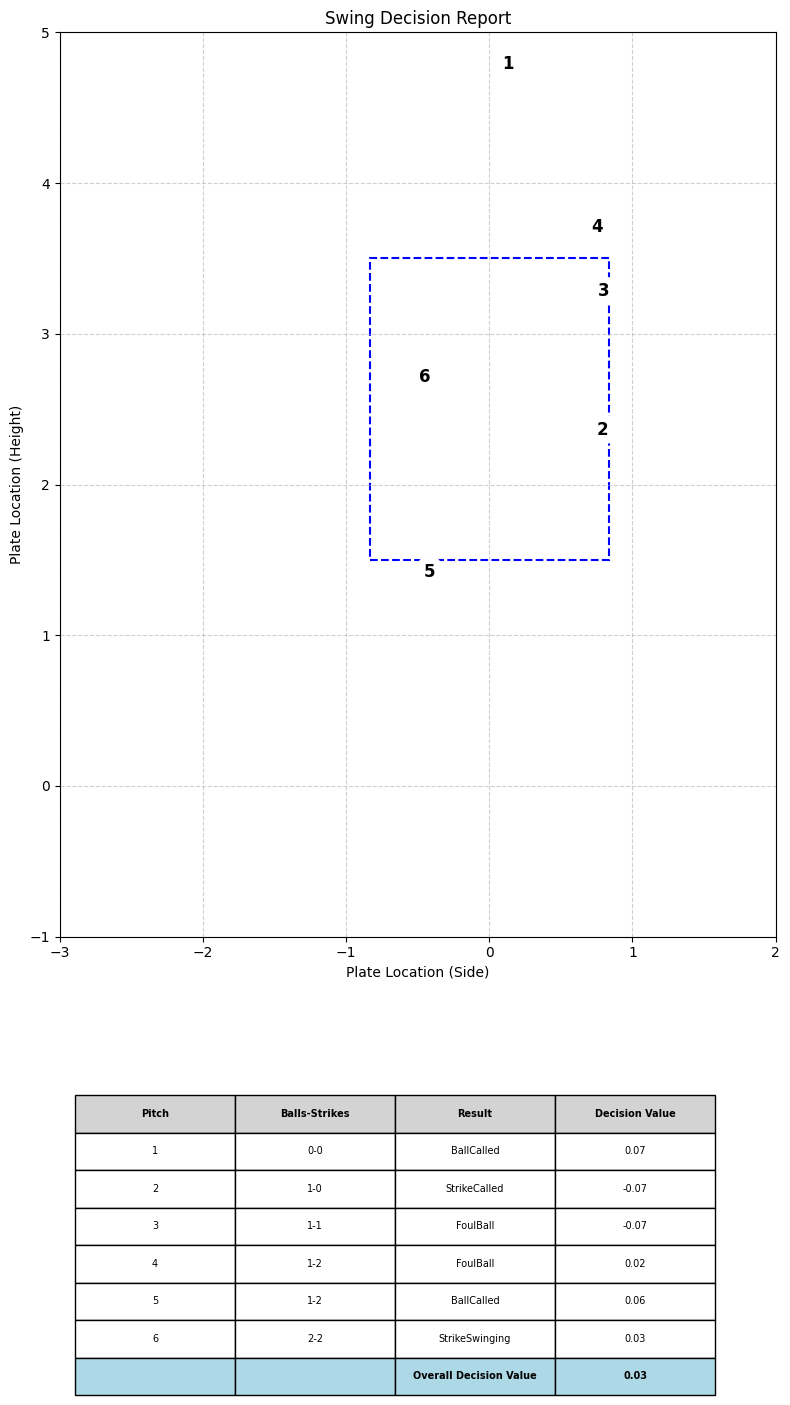

In [240]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Reset index to ensure proper sequential numbering from 1 to 6
sample_report2 = sample_report2.reset_index(drop=True)

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 10))

# Define strike zone boundaries
strike_zone_x_min = -0.833
strike_zone_x_max = 0.833
strike_zone_y_min = 1.5
strike_zone_y_max = 3.5

# Adjust plotting bounds to ensure all pitches are visible
ax.set_xlim(-3, 2)  # Expand based on PlateLocSide range
ax.set_ylim(-1, 5)   # Expand based on PlateLocHeight range

# Plot each pitch and annotate with pitch number
for idx, row in sample_report2.iterrows():
    color = 'green' if row['Swing/Take'] == 'Swing' else 'red'  # Color for swing/take
    pitch_number = idx + 1  # Number pitches 1 through 6
    
    # Plot the dot
    ax.scatter(row['PlateLocSide'], row['PlateLocHeight'], color=color, s=100, edgecolor='black')
    
    # Annotate with a bold number and a white background
    ax.text(row['PlateLocSide'], row['PlateLocHeight'], 
            str(pitch_number), 
            fontsize=12,  # Larger font size
            fontweight='bold',  # Bold font
            color='black',  # Black text color
            ha='center', va='center',  # Center alignment
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))  # Add a white background

# Add the strike zone rectangle
strike_zone = plt.Rectangle((strike_zone_x_min, strike_zone_y_min), 
                             strike_zone_x_max - strike_zone_x_min, 
                             strike_zone_y_max - strike_zone_y_min,
                             edgecolor='blue', facecolor='none', linestyle='--', linewidth=1.5)
ax.add_patch(strike_zone)

# Customize the plot
ax.set_title(f"Swing Decision Report")
ax.set_xlabel('Plate Location (Side)')
ax.set_ylabel('Plate Location (Height)')
ax.grid(True, linestyle='--', alpha=0.6)

# Add the table below the plot
table_data = [['Pitch', 'Balls-Strikes', 'Result', 'Decision Value']]
for idx, row in sample_report2.iterrows():
    pitch_number = idx + 1
    table_data.append([
        pitch_number, 
        f"{row['Balls']}-{row['Strikes']}",
        row['PitchCall'],
        f"{row['decision_value']:.2f}"
    ])

# Calculate the overall decision value
overall_decision_value = sample_report2['decision_value'].sum()
table_data.append(["", "", "Overall Decision Value", f"{overall_decision_value:.2f}"])

# Create the table
table_ax = fig.add_axes([0.1, -0.4, 0.8, 0.3])  # Adjust position and size as needed
table_ax.axis('off')
pitch_table = Table(table_ax, bbox=[0, 0, 1, 1])

# Add cells to the table
n_rows = len(table_data)
n_cols = len(table_data[0])
cell_width = 1.0 / n_cols
cell_height = 1.0 / n_rows

for i, row in enumerate(table_data):
    for j, cell_value in enumerate(row):
        cell = pitch_table.add_cell(i, j, width=cell_width, height=cell_height, text=cell_value, loc='center', facecolor='white')
        if i == 0:  # Header row
            cell.set_facecolor('lightgrey')
            cell.set_text_props(fontsize=10, fontweight='bold')  # Correct method for font properties
        if i == len(table_data) - 1:  # Bottom row for overall decision value
            cell.set_facecolor('lightblue')
            cell.set_text_props(fontsize=10, fontweight='bold')
        cell.set_edgecolor('black')

# Add the table to the axes
table_ax.add_table(pitch_table)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/vj/mr9gtxyd13s7vdvt74wwnw3h0000gn/T/ipykernel_12086/579363597.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


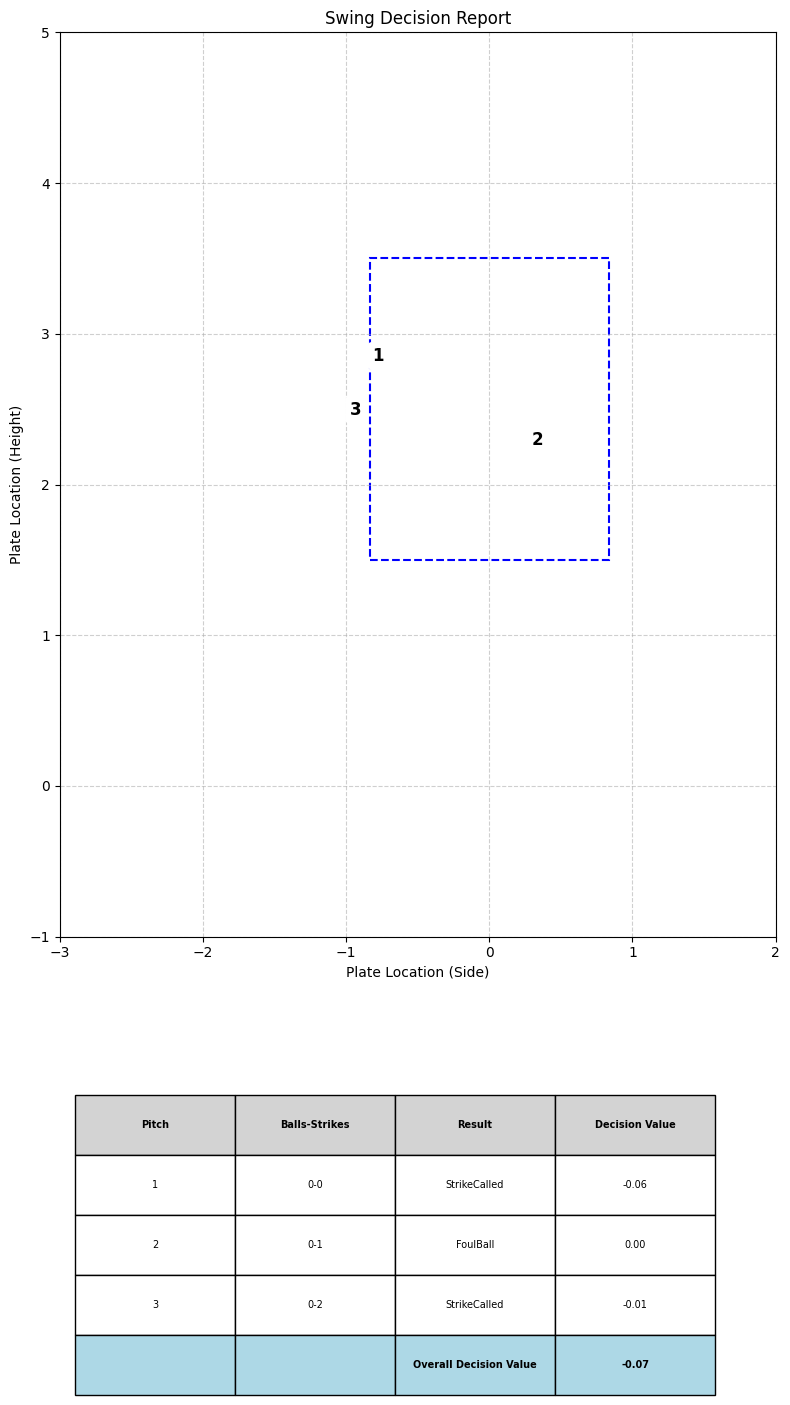

In [247]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Reset index to ensure proper sequential numbering from 1 to 6
sample_report3 = sample_report3.reset_index(drop=True)

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 10))

# Define strike zone boundaries
strike_zone_x_min = -0.833
strike_zone_x_max = 0.833
strike_zone_y_min = 1.5
strike_zone_y_max = 3.5

# Adjust plotting bounds to ensure all pitches are visible
ax.set_xlim(-3, 2)  # Expand based on PlateLocSide range
ax.set_ylim(-1, 5)   # Expand based on PlateLocHeight range


# Plot each pitch and annotate with pitch number
for idx, row in sample_report3.iterrows():
    color = 'green' if row['Swing/Take'] == 'Swing' else 'red'  # Color for swing/take
    pitch_number = idx + 1  # Number pitches 1 through 6
    
    # Plot the dot
    ax.scatter(row['PlateLocSide'], row['PlateLocHeight'], color=color, s=100, edgecolor='black')
    
    # Annotate with a bold number and a white background
    ax.text(row['PlateLocSide'], row['PlateLocHeight'], 
            str(pitch_number), 
            fontsize=12,  # Larger font size
            fontweight='bold',  # Bold font
            color='black',  # Black text color
            ha='center', va='center',  # Center alignment
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))  # Add a white background



# Add the strike zone rectangle
strike_zone = plt.Rectangle((strike_zone_x_min, strike_zone_y_min), 
                             strike_zone_x_max - strike_zone_x_min, 
                             strike_zone_y_max - strike_zone_y_min,
                             edgecolor='blue', facecolor='none', linestyle='--', linewidth=1.5)
ax.add_patch(strike_zone)

# Customize the plot
ax.set_title(f"Swing Decision Report")
ax.set_xlabel('Plate Location (Side)')
ax.set_ylabel('Plate Location (Height)')
ax.grid(True, linestyle='--', alpha=0.6)

# Add the table below the plot
table_data = [['Pitch', 'Balls-Strikes', 'Result', 'Decision Value']]
for idx, row in sample_report3.iterrows():
    pitch_number = idx + 1
    table_data.append([
        pitch_number, 
        f"{row['Balls']}-{row['Strikes']}",
        row['PitchCall'],  # Use the value from the PitchCall column
        f"{row['decision_value']:.2f}"
    ])

# Calculate the overall decision value
overall_decision_value = sample_report3['decision_value'].sum()
table_data.append(["", "", "Overall Decision Value", f"{overall_decision_value:.2f}"])

# Create the table
table_ax = fig.add_axes([0.1, -0.4, 0.8, 0.3])  # Adjust position and size as needed
table_ax.axis('off')
pitch_table = Table(table_ax, bbox=[0, 0, 1, 1])

# Add cells to the table
n_rows = len(table_data)
n_cols = len(table_data[0])
cell_width = 1.0 / n_cols
cell_height = 1.0 / n_rows

for i, row in enumerate(table_data):
    for j, cell_value in enumerate(row):
        cell = pitch_table.add_cell(i, j, width=cell_width, height=cell_height, text=cell_value, loc='center', facecolor='white')
        if i == 0:  # Header row
            cell.set_facecolor('lightgrey')
            cell.set_text_props(fontsize=10, fontweight='bold')  # Correct method for font properties
        if i == len(table_data) - 1:  # Bottom row for overall decision value
            cell.set_facecolor('lightblue')
            cell.set_text_props(fontsize=10, fontweight='bold')
        cell.set_edgecolor('black')

# Add the table to the axes
table_ax.add_table(pitch_table)

# Show the plot
plt.tight_layout()
plt.show()

In [205]:
sample_report3[['Balls', 'Strikes', 'Swing/Take', 'PlayResult', 'PitchCall', 'swing_value', 'take_value', 'PlateLocSide', 'PlateLocHeight']]

,Balls,Strikes,Swing/Take,PlayResult,PitchCall,swing_value,take_value,PlateLocSide,PlateLocHeight
0,0,0,Take,Undefined,StrikeCalled,0.254945,-1.019257,0.43634,1.78187
1,0,1,Swing,Undefined,FoulBall,0.505912,-1.119193,-0.71789,2.84230
2,0,2,Take,Undefined,BallCalled,1.269508,0.516704,-0.82237,4.61781
3,1,2,Swing,Undefined,FoulBall,2.214628,-0.301022,-0.49565,2.26463
4,1,2,Take,Undefined,BallCalled,0.788392,1.168406,0.26332,4.53118
5,2,2,Swing,Undefined,StrikeSwinging,0.663671,0.279937,0.47026,3.35700


13